In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
validation_split=0.2
IMG_WIDTH=256
IMG_HEIGHT=256
prob=0.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

def create_dataset(img_folder,noise_type="gaussian",mean=0,std=0.1,lower_thres=25):
   
    img_data_array=[]
    Y=[]
    i=0
    for file in os.listdir(img_folder):
        i+=1
        image_path= os.path.join(img_folder,  file)
        image= cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
       
        
       
        if noise_type=="gaussian":
            image=np.array(image,dtype="float32")
            noise = np.random.normal(loc=mean,scale=std,size=(IMG_HEIGHT, IMG_WIDTH));
            image=image/255
            y=(noise+image);
            
            
             
        elif noise_type=="salt_pepper":
          
            noise = np.random.randint(low=0,high=255,size=(IMG_HEIGHT, IMG_WIDTH));
            pepper=np.asarray(noise>lower_thres,dtype="uint8")
            y=image*pepper
            y=np.asarray(y,dtype="uint8")
            salt=np.asarray(noise<lower_thres,dtype="uint8")*255
            y=y+salt
            y=y/np.max(y)
            image=image/255
        

        
        img_data_array.append(image)
        Y.append(y)
        print(i)
    return img_data_array,Y
# extract the image array and class name
im_folder_chest_xray="/content/drive/MyDrive/mixed/"
im_folder_radiology="/content/drive/MyDrive/RawImage/TrainingData"
img_data,noised_data=create_dataset(im_folder_chest_xray,noise_type="salt_pepper",mean=0,std=0.4,lower_thres=190)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


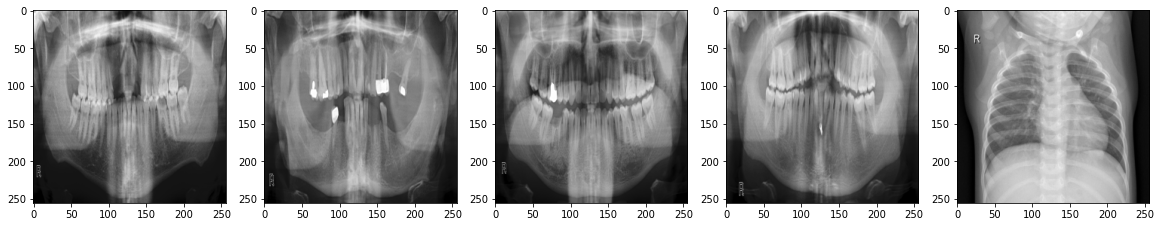

In [ ]:
plt.figure(figsize=(20,20))

for i in range(5):
    image_=img_data[i*30]
    
    print(np.shape(image_))
    ax=plt.subplot(2,5,i+1)
    plt.imshow(np.array(image_),cmap="gray")


(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


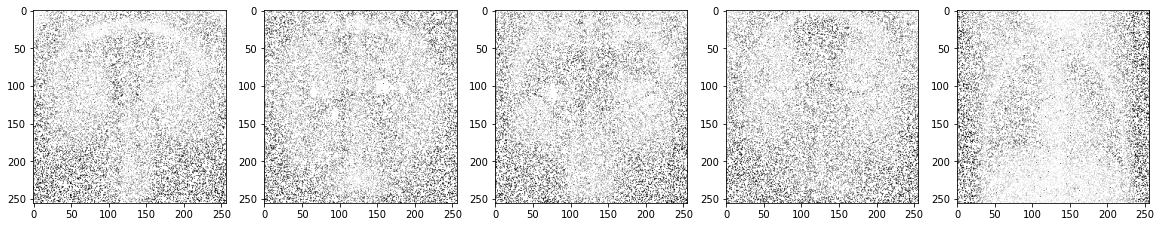

In [ ]:
plt.figure(figsize=(20,20))
for i in range(5):
   
    noisy_=noised_data[i*30]
    
    
    print(np.shape(noisy_))
    ax=plt.subplot(2,5,i+1)
    plt.imshow(np.array(noisy_),cmap="gray",vmin=0,vmax=1)

In [ ]:
from random import shuffle
def train_test_gen(img_data,noised_data):
  X=[]
  Y=[]
#Adding noise to image,shuffle and split it into train,test and validate
  if len(img_data)==len(noised_data):
    train_X = np.reshape(img_data, (len(img_data), IMG_HEIGHT, IMG_WIDTH,1)) 
    train_Y=np.reshape(noised_data,(len(noised_data), IMG_HEIGHT, IMG_WIDTH,1))
  else:
    print("ERROR!")

  ind_list = [i for i in range(np.shape(train_X)[0])]
  shuffle(ind_list)
  X = train_X[ind_list, :,:,:]
  Y=train_Y[ind_list, :,:,:]
#target_new = target[ind_list,]
  print(np.shape(X)[0])
  print(np.shape(Y))


  indices = np.random.permutation(np.shape(X)[0])
  print(np.floor(validation_split*len(indices)))
  valid_data_index=indices[0:int(np.floor(validation_split*len(indices)))]
  train_data_index=indices[int(np.floor(validation_split*len(indices))):]


  train_X,train_Y = X[train_data_index,:], Y[train_data_index,:]
  valid_X,valid_Y = X[valid_data_index,:], Y[valid_data_index,:]
  print(np.shape(train_X))
  print(np.shape(valid_Y))
  return train_X,train_Y,valid_X,valid_Y
train_X,train_Y,valid_X,valid_Y=train_test_gen(img_data,noised_data)

710
(710, 256, 256, 1)
142.0
(568, 256, 256, 1)
(142, 256, 256, 1)


**Don't look at this Block**

NOISY_IMAGES---Top row
NOISELESS_IMAGES---Bottom row


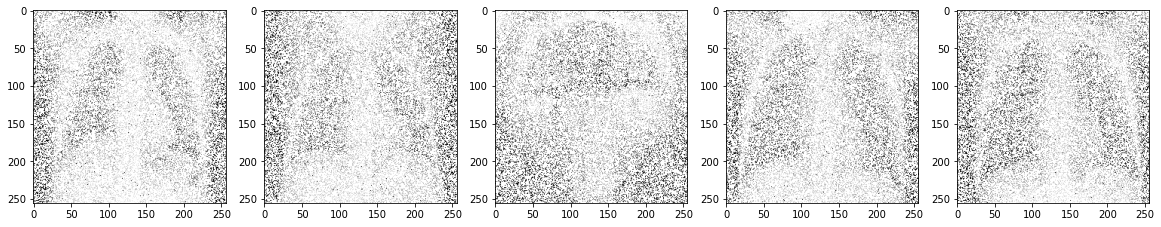

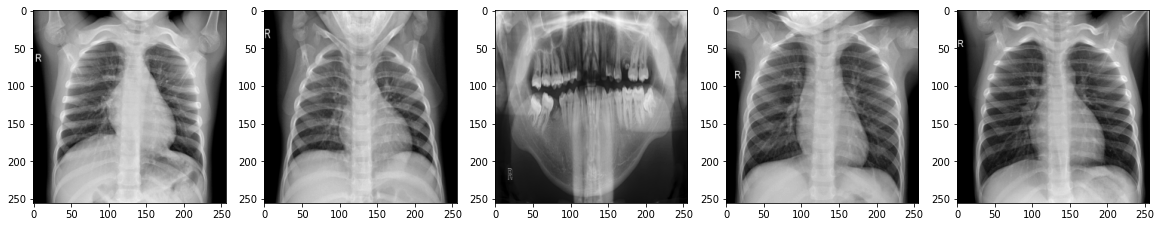

In [ ]:
def plot_noisy_and_orig(valid_Y,valid_X):
  plt.figure(figsize=(20,20))
  print("NOISY_IMAGES---Top row")
  for i in range(5):
   
    noisy_=valid_Y[i,:,:,:]
    
    
    
    ax=plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(np.array(noisy_),(IMG_HEIGHT, IMG_WIDTH)),cmap="gray",vmin=0,vmax=1)

  print("NOISELESS_IMAGES---Bottom row")
  plt.figure(figsize=(20,20))
  for i in range(5):
   
    noisy_=valid_X[i,:,:,:]
    
    
    
    ax=plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(np.array(noisy_),(IMG_HEIGHT, IMG_WIDTH)),cmap="gray",vmin=0,vmax=1)
plot_noisy_and_orig(valid_Y,valid_X)

In [ ]:

from keras.initializers import orthogonal
import keras
from keras.models import Model
from keras.optimizers import Adadelta,Adam
from keras.layers import Input, Conv2D,Conv2DTranspose, MaxPool2D, UpSampling2D,BatchNormalization,LeakyReLU,Dropout,concatenate
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
import keras.backend as K
IMG_HEIGHT=256
IMG_WIDTH=256
def SSIM(y_true,y_pred):
  C1=(0.0001)
  C2=0.0009
  C3=0.00045
  y_pf=K.flatten(y_pred)
  y_tf=K.flatten(y_true)
  u_ytrue=K.mean(y_tf)
  u_ypred=K.mean(y_pf)
  var_ytrue=K.var(y_tf)
  var_ypred=K.var(y_pf)
  std_ytrue=K.std(y_tf)
  std_ypred=K.std(y_pf)
 
  N=K.cast((len(y_pf)-1),"float32")
  cov=K.sum((y_pf-u_ypred)*(y_tf-u_ytrue)/N)

  I=(2.0*u_ytrue*u_ypred+C1)/(K.square(u_ytrue)+K.square(u_ypred)+C1)
  C=(2.0*std_ytrue*std_ypred+C2)/(K.square(std_ytrue)+K.square(std_ypred)+C2)
  S=1.0*(cov+C3)/(std_ypred*std_ytrue+C3)

  return S*I*C

def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,
                      kernel_initializer=kernel_init, name=prefix+'conv')(x)
    x = LeakyReLU(name=prefix+'lrelu')(x)
    x = Dropout(0.2, name=prefix+'drop')((x))
    x = BatchNormalization(name=prefix+'conv_bn')(x)
    return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x =Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,
                               kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
    x = LeakyReLU(name=prefix+'lrelu')(x)
    x =Dropout(0.2, name=prefix+'drop')((x))
    x = BatchNormalization(name=prefix+'conv_bn')(x)
    return x



def AutoEncdoer(input_shape):
    inputs =Input(shape=input_shape)
    
    # 256 x 256
    conv1 = Conv2DLayer(inputs, 64, 3, strides=1, padding='same', block_id=1)
    conv2 = Conv2DLayer(conv1, 64, 3, strides=2, padding='same', block_id=2)
    
    # 128 x 128
    conv3 = Conv2DLayer(conv2, 128, 5, strides=2, padding='same', block_id=3)
    
    # 64 x 64
    conv4 = Conv2DLayer(conv3, 128, 3, strides=1, padding='same', block_id=4)
    conv5 = Conv2DLayer(conv4, 256, 5, strides=2, padding='same', block_id=5)
    
    # 32 x 32
    conv6 = Conv2DLayer(conv5, 512, 3, strides=2, padding='same', block_id=6)
    
    # 16 x 16
    deconv1 = Transpose_Conv2D(conv6, 512, 3, strides=2, padding='same', block_id=7)
    
    # 32 x 32
    skip1 = concatenate([deconv1, conv5], name='skip1')
    conv7 = Conv2DLayer(skip1, 256, 3, strides=1, padding='same', block_id=8)
    deconv2 = Transpose_Conv2D(conv7, 128, 3, strides=2, padding='same', block_id=9)
    
    # 64 x 64
    skip2 =concatenate([deconv2, conv3], name='skip2')
    conv8 = Conv2DLayer(skip2, 128, 5, strides=1, padding='same', block_id=10)
    deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
    
    # 128 x 128
    skip3 = concatenate([deconv3, conv2], name='skip3')
    conv9 = Conv2DLayer(skip3, 64, 5, strides=1, padding='same', block_id=12)
    deconv4 = Transpose_Conv2D(conv9, 64, 3, strides=2, padding='same', block_id=13)
    
    # 256 x 256
    skip3 = concatenate([deconv4, conv1])
    conv10 = Conv2D(1, 3, strides=1, padding='same', activation='sigmoid',
                       kernel_initializer=orthogonal(), name='final_conv')(skip3)

    
    return Model(inputs=inputs, outputs=conv10)

In [ ]:


model = AutoEncdoer((IMG_HEIGHT,IMG_WIDTH,1))
model.summary()
# model_opt = SGD(lr=0.005, decay=1-0.995, momentum=0.7, nesterov=False)

#modelchk =ModelCheckpoint(saved_weight, monitor='val_acc', verbose=1,save_best_only=True, save_weights_only=False,mode='auto',period=2)

#tensorboard = TensorBoard(log_dir=P_LOGS,histogram_freq=0,write_graph=True, write_images=True)

#csv_logger = keras.callbacks.CSVLogger(f'{P_LOGS}/keras_log.csv',append=True)
#model.fit_generator(train_noisy_batches, steps_per_epoch = train_batches.samples // batch_size,epochs=epochs,verbose=1,  validation_data=val_noisy_batches,validation_steps = train_batches.samples // batch_size,callbacks=[modelchk, tensorboard, csv_logger],use_multiprocessing=True)



Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
block_1_conv (Conv2D)           (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
block_1_lrelu (LeakyReLU)       (None, 256, 256, 64) 0           block_1_conv[0][0]               
__________________________________________________________________________________________________
block_1_drop (Dropout)          (None, 256, 256, 64) 0           block_1_lrelu[0][0]              
_______________________________________________________________________________________

In [ ]:

model_opt = Adam(lr=0.002)

model.compile(optimizer=model_opt, loss='mse', metrics=[SSIM])

In [ ]:

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode="min",restore_best_weights=False),
    ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model_gauss.h5', verbose=1, save_best_only=True, save_weights_only=True,)
]


history =model.fit(train_Y,train_X,epochs=50,batch_size=32,shuffle=False,validation_data=(valid_Y, valid_X),callbacks=callbacks)


Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 0.0303 - SSIM: 0.7687
Epoch 00001: val_loss improved from inf to 0.27097, saving model to model_gauss.h5
18/18 [==============================] - 20s 1s/step - loss: 0.0303 - SSIM: 0.7687 - val_loss: 0.2710 - val_SSIM: 7.2197e-06
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 0.0098 - SSIM: 0.9192
Epoch 00002: val_loss did not improve from 0.27097
18/18 [==============================] - 16s 898ms/step - loss: 0.0098 - SSIM: 0.9192 - val_loss: 0.2710 - val_SSIM: 1.8618e-05
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 0.0067 - SSIM: 0.9430
Epoch 00003: val_loss did not improve from 0.27097
18/18 [==============================] - 16s 906ms/step - loss: 0.0067 - SSIM: 0.9430 - val_loss: 0.2807 - val_SSIM: -0.3201
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 0.0055 - SSIM: 0.9525
Epoch 00004: val_loss improved from 0.27097 to 0.15802, saving model to model

dict_keys(['loss', 'SSIM', 'val_loss', 'val_SSIM', 'lr'])


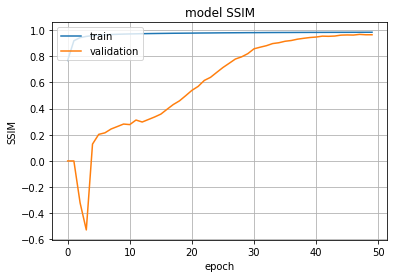

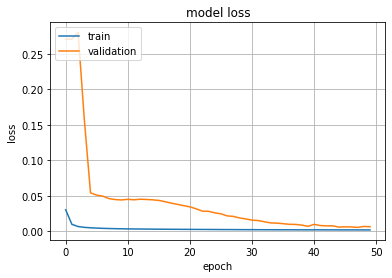

In [ ]:
print(history.history.keys())

plt.plot(history.history['SSIM'])
plt.plot(history.history['val_SSIM'])
plt.title('model SSIM')
plt.ylabel('SSIM')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()

plt.show()


In [ ]:
predictions = model.predict(valid_Y)

In [ ]:
print(np.shape(predictions))

(142, 256, 256, 1)


prediction score is
5/5 [==============================] - 1s 204ms/step - loss: 0.0064 - SSIM: 0.9650
[0.006374366581439972, 0.9650042653083801]
NOISY_IMAGE----Top Row 
Filtered image----Bottom Row 
0.8886562
0.87687784
0.89857495
0.90158516
0.8976933


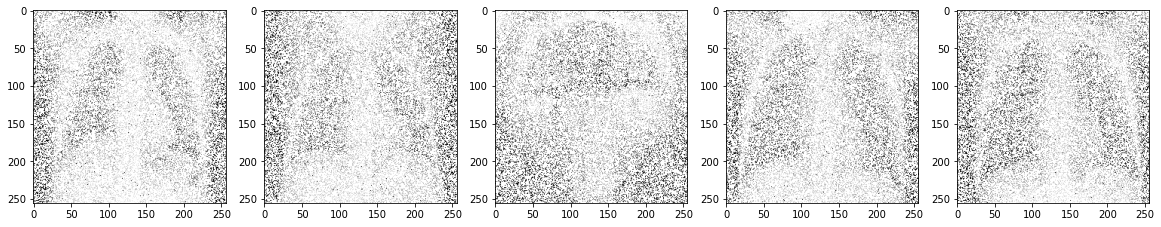

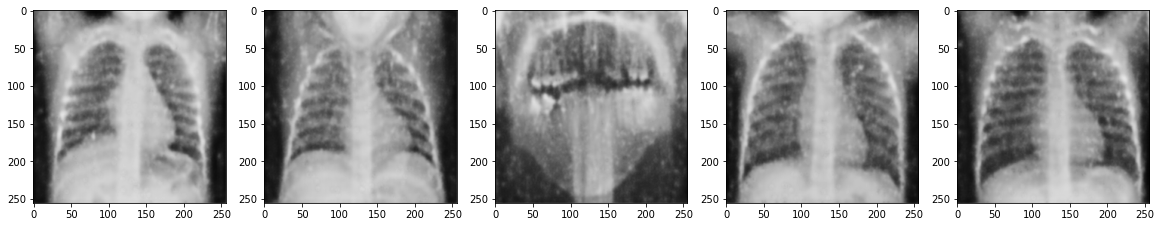

In [ ]:
def predict_n_plot(noisy,ground):
  predictions = model.predict(noisy)
  print("prediction score is")
  print(model.evaluate(x=noisy,y=ground))
  print("NOISY_IMAGE----Top Row ")
  plt.figure(figsize=(20,20))
  for i in range(5):
   
    orig=noisy[i,:,:,:]
    orig=orig*255.0/np.max(orig)
    ax=plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(np.array(orig),(256,256)),cmap="gray",vmin=0,vmax=255)
  print("Filtered image----Bottom Row ")
  plt.figure(figsize=(20,20))

  for i in range(5):
   
    filtered=predictions[i,:,:,:]
    print(np.max(filtered))
    
    ax=plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(np.array(filtered),(256,256)),cmap="gray",vmin=0,vmax=1)
predict_n_plot(valid_Y,valid_X)

In [ ]:
img_data2,noised_data2=create_dataset(im_folder_radiology,noise_type="salt_pepper",mean=0,std=0.6,lower_thres=150)
train_X2,train_Y2,valid_X2,valid_Y2=train_test_gen(img_data2,noised_data2)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
150
(150, 256, 256, 1)
30.0
(120, 256, 256, 1)
(30, 256, 256, 1)


prediction score is
1/1 [==============================] - 0s 2ms/step - loss: 0.0062 - SSIM: 0.9609
[0.006227225996553898, 0.9608925580978394]
NOISY_IMAGE----Top Row 
Filtered image----Bottom Row 
0.9157665
0.90678126
0.93127036
0.9249469
0.9313043


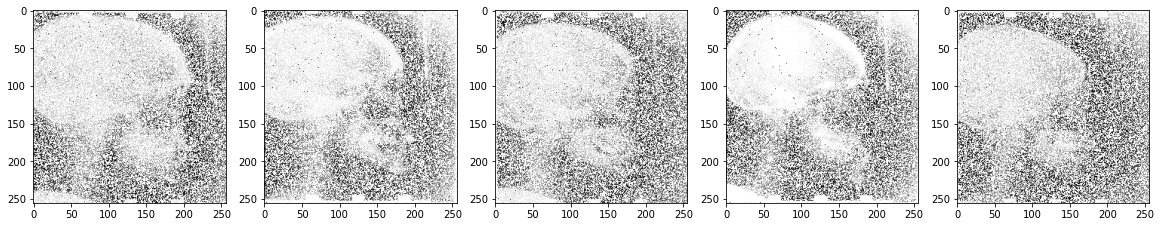

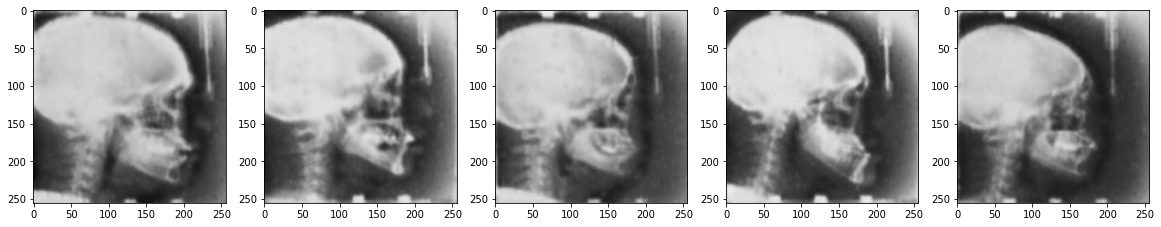

In [ ]:
predict_n_plot(valid_Y2,valid_X2)